In [1]:
# ===== Cell 1: Import Required Libraries =====
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# ===== Cell 2: Load Cleaned Data =====
data_path = "../CleanDeta/order_full_cleaned.csv"
order_full = pd.read_csv(data_path, parse_dates=['order_purchase_timestamp'])


In [3]:
# ===== Cell 3: Create is_delayed Binary Target =====
order_full['is_delayed'] = order_full['delay_days'].apply(lambda x: 1 if x > 1 else 0)


In [8]:
# ===== Cell 4: Feature Selection with 'month' Included =====
features = ['shipping_days', 'freight_value', 'price', 'payment_value',  'month']
order_full = order_full.dropna(subset=features + ['is_delayed'])
X = order_full[features]
y = order_full['is_delayed']

In [9]:
# ===== Cell 5: Train-Test Split =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ===== Cell 6: Random Forest Classifier Training =====
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Classification Report (with Month Feature):

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     21904
           1       0.81      0.68      0.74      1242

    accuracy                           0.97     23146
   macro avg       0.90      0.83      0.86     23146
weighted avg       0.97      0.97      0.97     23146



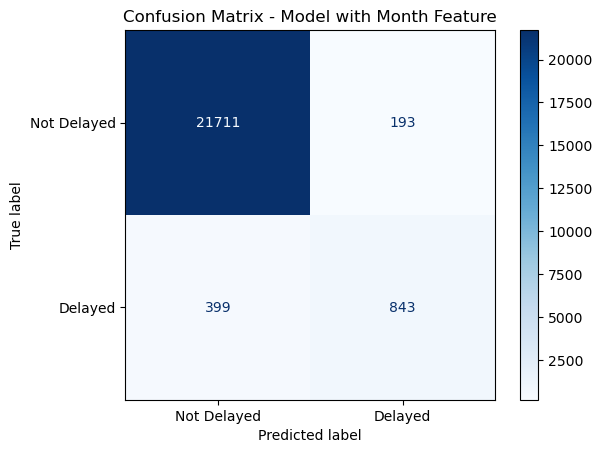

In [10]:
# ===== Cell 7: Evaluation =====
print("\nClassification Report (with Month Feature):\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Delayed", "Delayed"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Model with Month Feature")
plt.grid(False)
plt.show()

/var/folders/pl/2h31dnhx49s3vqnb89w_bk580000gn/T/ipykernel_35254/4257842423.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_df, x='Importance', y='Feature', palette='viridis')


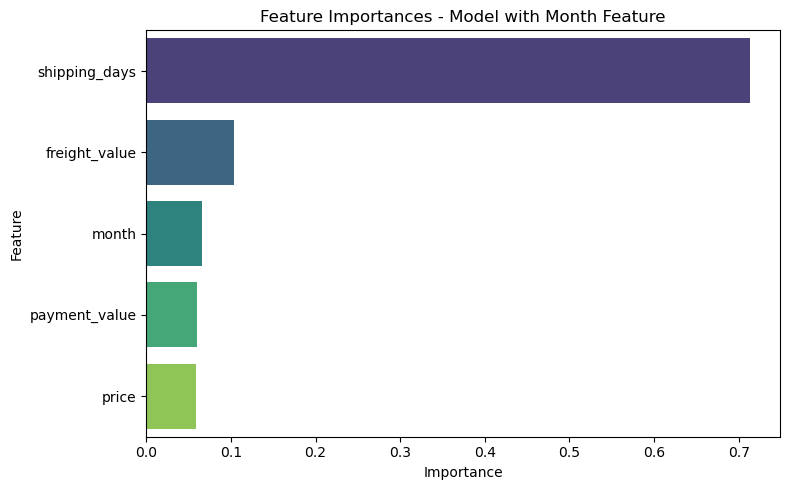

In [11]:
# ===== Cell 8: Feature Importance =====
importances = model.feature_importances_
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=feature_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances - Model with Month Feature')
plt.tight_layout()
plt.show()
